In [1]:
# install necessary package
!pip install tensorflow_addons

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 11.5 MB/s eta 0:00:00


In [2]:
import os
import pandas as pd
import numpy as np
import random
from PIL import Image
import matplotlib.pyplot as plt
import tensorflow as tf
import tensorflow_addons as tfa
from tensorflow import keras
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
from tensorflow.keras.callbacks import EarlyStopping
from keras import models
from keras import layers
import seaborn as sns
import matplotlib.pyplot as plt

random.seed(2)
%matplotlib inline

/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


In [3]:
#1. Mount Drive
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)
gdrive = "/content/gdrive/MyDrive/207_project_files"
#KP: You'll see a pop-up from google to sign-in and connect to your drive

Mounted at /content/gdrive


In [4]:
#2. Copy archive.zip to gdrive to /home
#gdrive = "/content/gdrive/MyDrive"
!cp $gdrive/archive.zip /home

In [5]:
!rm -rf /home/data

In [6]:
#3. Unzip archive.zip to /home/data/full
!mkdir -p /home/data/full
!unzip /home/archive.zip -d /home/data/full/ > /dev/null

In [7]:
!mv /home/data/full/Driver\ Drowsiness\ Dataset\ \(DDD\) /home/data/train

!mv /home/data/train/Non\ Drowsy  /home/data/train/NonDrowsy

In [8]:
!ls /home/data/train/Drowsy | tail

ZC1349.png
ZC1350.png
ZC1351.png
ZC1352.png
ZC1353.png
ZC1354.png
ZC1355.png
ZC1356.png
ZC1357.png
ZC1358.png


In [9]:
!ls /home/data/train/NonDrowsy | tail

zc1697.png
zc1698.png
zc1699.png
zc1700.png
zc1702.png
zc1703.png
zc1704.png
zc1705.png
zc1706.png
zc1707.png


In [10]:
# Randomize file_names in train dataset

import os
import csv
import random
import string

def randomize_file_names (dir_path, mapping_file_name):


  # create a list of all the files in the directory
  files = os.listdir(dir_path)

  # create a dictionary to store the old and new file names
  file_mapping = {}

  # loop through each file in the directory
  for file in files:
      # generate a random string of 10 characters
      new_name = ''.join(random.choices(string.ascii_uppercase + string.digits, k=10))
      # get the file extension
      ext = os.path.splitext(file)[1]
      # create the new file name with the random string and the original file extension
      new_file_name = new_name + ext
      # rename the file
      os.rename(os.path.join(dir_path, file), os.path.join(dir_path, new_file_name))
      # add the old and new file names to the dictionary
      file_mapping[file] = new_file_name

  # write the file mapping to a csv file
  with open(mapping_file_name, 'w', newline='') as csvfile:
      writer = csv.writer(csvfile)
      writer.writerow(['Old Name', 'New Name'])
      for key, value in file_mapping.items():
          writer.writerow([key, value])

randomize_file_names ("/home/data/train/NonDrowsy/", 'file_mapping_NonDrowsy.csv')
randomize_file_names ("/home/data/train/Drowsy/", 'file_mapping_Drowsy.csv')


In [11]:
# Dump old test folder and recreate it
# !rm -rf /home/data/test/Drowsy
# !rm -rf /home/data/test/NonDrowsy

# !mkdir -p /home/data/test/Drowsy
# !mkdir -p /home/data/test/NonDrowsy



In [12]:
# Train and Test split on original dataset (not being used any more now)
# import os
# import random
# import shutil

# def split_test(percent, src_dir, dst_dir):

#   # get a list of all the image files in the source directory
#   image_files = [f for f in os.listdir(src_dir) if f.endswith('.jpg') or f.endswith('.png')]

#   # calculate the number of images to move
#   num_images_to_move = int(len(image_files) * percent)

#   # randomly select the images to move
#   images_to_move = random.sample(image_files, num_images_to_move)

#   # move the selected images to the destination directory
#   for image in images_to_move:
#       src_path = os.path.join(src_dir, image)
#       dst_path = os.path.join(dst_dir, image)
#       shutil.move(src_path, dst_path)

# split_test(0.3, '/home/data/train/Drowsy', '/home/data/test/Drowsy')
# split_test(0.3, '/home/data/train/NonDrowsy', '/home/data/test/NonDrowsy')

In [13]:
# # Verify sample Drowsy files  (not in use anymore)
# !ls /home/data/test/Drowsy | tail

In [14]:
# # Verify sample NonDrowsy files (not in use anymore)
# !ls /home/data/test/NonDrowsy | tail

In [15]:
# Remove old manual_annotate folders if exist
!rm -rf /home/data/manual_annotate/

!cp -r $gdrive/data_sample/manual_annotate/  /home/data/manual_annotate/

In [16]:
# Verify sample Drowsy files in test
!ls /home/data/manual_annotate/test/Drowsy | tail

ZC0003.png
ZC0007.png
ZC0038.png
ZC0050.png
ZC0059.png
ZC0076.png
ZC0081.png
ZC0112.png
ZC0128.png
ZC0157.png


In [17]:
# Verify sample NonDrowsy files in test
!ls /home/data/manual_annotate/test/NonDrowsy | tail

zc0001.png
zc0013.png
zc0031.png
zc0042.png
zc0103.png
zc0199.png
zc0251.png
zc0334.png
zc0801.png
zc1040.png


In [18]:
# Verify sample Drowsy files in train
!ls /home/data/manual_annotate/train/Drowsy | tail

R0010.png
R0036.png
R0076.png
R0086.png
R0091.png
R0166.png
R0168.png
R0169.png
R0171.png
R0219.png


In [19]:
# Verify sample NonDrowsy files in train

!ls /home/data/manual_annotate/train/NonDrowsy | tail

r0001.png
r0014.png
r0043.png
r0068.png
r0125.png
r0169.png
r0261.png
r0303.png
r0371.png
r0522.png


In [20]:
# TBD: Add in option to switch between local and gcp instance run option
# Make use of base_variable and additional paths

# original_drowsy_dataset_dir = './data/original_dataset/Drowsy'
# original_nondrowsy_dataset_dir = './data/original_dataset/NonDrowsy'

original_drowsy_dataset_dir = '/home/data/train/Drowsy'
original_nondrowsy_dataset_dir = '/home/data/train/NonDrowsy'


# manual_annotation_train_drowsy_dir = './data/manual_annotate/train/Drowsy'
# manual_annotation_train_nondrowsy_dir = './data/manual_annotate/train/NonDrowsy'

manual_annotation_train_drowsy_dir = '/home/data/manual_annotate/train/Drowsy'
manual_annotation_train_nondrowsy_dir = '/home/data/manual_annotate/train/NonDrowsy'


# manual_annotation_test_drowsy_dir = './data/manual_annotate/test/Drowsy'
# manual_annotation_test_nondrowsy_dir = './data/manual_annotate/test/NonDrowsy'

manual_annotation_test_drowsy_dir = '/home/data/manual_annotate/test/Drowsy'
manual_annotation_test_nondrowsy_dir = '/home/data/manual_annotate/test/NonDrowsy'



# manual_annotation_nondrowsy_dir = './data/manual_annotate/NonDrowsy'
# train_dir = './data/manual_annotate/train80'

manual_annotation_nondrowsy_dir = '/home/data/manual_annotate/NonDrowsy'
train_dir = '/home/data/manual_annotate/train80'

#### Dataset

The Driver Drowsiness Dataset (DDD) (https://www.kaggle.com/datasets/ismailnasri20/driver-drowsiness-dataset-ddd/) is an extracted and cropped faces of drivers from the videos of the Real-Life Drowsiness Dataset. The frames were extracted from videos as images using VLC software. After that, the Viola-Jones algorithm has been used to extract the region of interest from captured images. The dataset on Kaggle has following properties

The dataset has the following properties :
• RGB images
• 2 classes (Drowsy & Non Drowsy)
• Size of image : 227 x 227
• More than 41,790 images in total


In [21]:
def get_file_count(folder_path):
    # Get the list of files in the folder
    files = os.listdir(folder_path)

    # Count the number of files
    file_count = len(files)

    return file_count

# Get the file counts
drowsy_count = get_file_count(original_drowsy_dataset_dir)
non_drowsy_count = get_file_count(original_nondrowsy_dataset_dir)

# Create a dataframe
df = pd.DataFrame({'Category': ['Drowsy', 'Non Drowsy'], 'Count': [drowsy_count, non_drowsy_count]})

# Display the dataframe
display(df)


,Category,Count
0,Drowsy,22348
1,Non Drowsy,19445


Drowsy folder contains around 22348 files and Non Drowsy folder contains around 19445 files. Upon further analysis it was found that there were multiple images of same person increasing the count in dataset. Also, the data set seemed to have incorrect labeling. Lot of images that seemed Non Drowsy were labeled as Drowsy.

Hence, a concious decision was taken to manually label 10 images of each person that distinctly categorized image as drowsy and Non Drowsy.

In [22]:
# Get the file counts
train_drowsy_count = get_file_count(manual_annotation_train_drowsy_dir)
train_non_drowsy_count = get_file_count(manual_annotation_train_nondrowsy_dir)

test_drosy_count = get_file_count(manual_annotation_test_drowsy_dir)
test_nondrowsy_count = get_file_count(manual_annotation_test_nondrowsy_dir)

total_drowsy_count = train_drowsy_count + test_drosy_count
total_non_drowsy_count = train_non_drowsy_count + test_nondrowsy_count

# Create a dataframe
df = pd.DataFrame({'Category': ['Drowsy', 'Non Drowsy'], 'Count': [total_drowsy_count, total_non_drowsy_count]})

# Display the dataframe
display(df)

,Category,Count
0,Drowsy,276
1,Non Drowsy,234


A comprehensive dataset comprising 510 images underwent manual annotation. These images are designated for training, validation, and testing purposes. They are to be divided into respective subsets for training, validation, and testing, adhering to a proportional allocation of 60%, 20%, and 20%. Given the nature of the labeling process, which involved approximately 10 images per individual, there exists a potential overlap wherein the test subset might include images of individuals previously encountered during the model's training phase. To address this and to assess the model's performance with previously unseen data, a distinct set of images, specifically those featuring individuals whose names commence with letters S through Z, has been segregated. This measure is intended to evaluate the model's generalization capabilities on novel data.

#### Drowsy Annotated Images

In [23]:
def plot_images(directory, title):

    # Get the list of image files in the directory
    image_files = os.listdir(directory)

    # Create a figure with a grid of 1x4 subplots
    fig, axs = plt.subplots(1, 4, figsize=(12, 3))

    # Loop through the first 4 image files
    for i in range(4):
        # Get the image file path
        image_file = os.path.join(directory, image_files[i])

        # Open the image using PIL
        image = Image.open(image_file)

        # Display the image in the corresponding subplot
        axs[i].imshow(image)
        axs[i].axis('on')

        # Display the label above the image
        axs[i].set_title(title, fontsize=10, pad=2)

        # Add grid lines to the subplot
        axs[i].grid(True)

    # Show the figure
    plt.show()


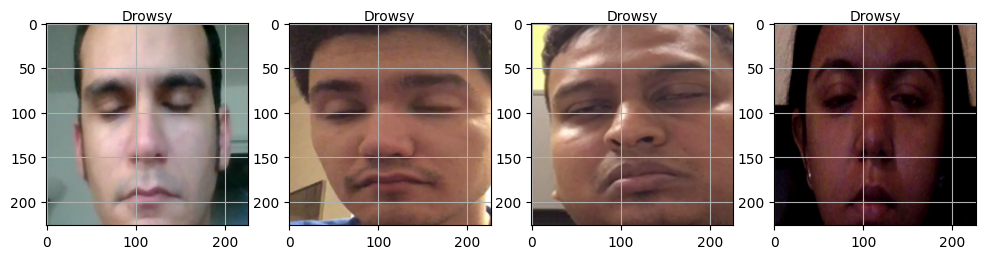

In [24]:
# Set the directory path
plot_images(directory = manual_annotation_train_drowsy_dir, title = 'Drowsy')

#### Non Drowsy Annotated Images

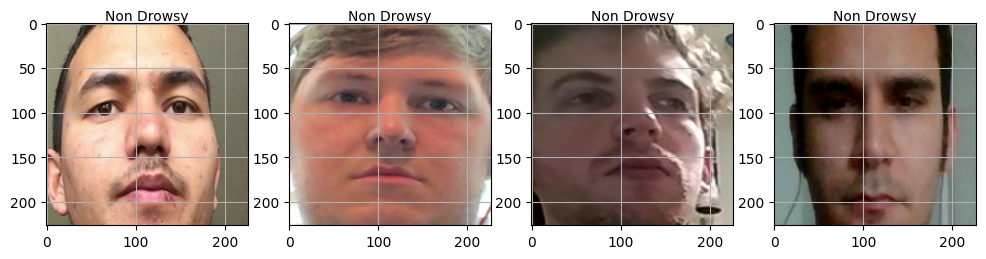

In [25]:
plot_images(directory = manual_annotation_train_nondrowsy_dir, title = 'Non Drowsy')

#### Preprocessing
The preprocessing of the image dataset will be executed through a two-stage process. Initially, the first stage will involve the random selection of 150 images each from directories labeled 'Drowsy' and 'NonDrowsy'. Selecting equal images would balance our dataset. In this phase, images from the 'Drowsy' directory will be annotated with a label of 1, while those from the 'NonDrowsy' directory will receive a label of 0, thus facilitating binary classification.

Subsequently, the second stage of preprocessing will focus on standardizing the dimensions of the images to a uniform size of 80x80 pixels. The data is split in training, validation and test set in this step. Additionally, this stage will incorporate various image augmentation techniques, including the adjustment of brightness and contrast, as well as the horizontal flipping of images. These augmented images will then be systematically incorporated into the training dataset, thereby enriching it and potentially enhancing the robustness of the model by exposing it to a more diverse range of data variations.

In [26]:
def data_preprocess_step1(train_dir, num_images=150):
    # create empty lists to store the images and their labels
    images = []
    labels = []

    # loop through each subdirectory
    for subdir in os.listdir(train_dir):
        path = os.path.join(train_dir, subdir)
        print(path)
        if os.path.isdir(path):

            # get a list of all the image files in the subdirectory
            image_files = os.listdir(path)

            # randomly select num_images images from the list
            selected_images = random.sample(image_files, num_images)

            # loop through the selected images
            for image_file in selected_images:
                # load the image using load_img
                img = load_img(os.path.join(path, image_file), target_size=(80, 80))

                # convert the image to an array using img_to_array
                img_array = img_to_array(img)

                # append the image and its label to the lists
                images.append(img_array)

                if subdir == "Drowsy":
                    labels.append(1)
                else:
                    labels.append(0)

    # convert the images and labels to numpy arrays
    images = np.stack(images)
    labels = np.array(labels).flatten()
    return images, labels

In [27]:
def preprocess_data_step2(images, y, split=(0.6,0.2,0.2), IMAGE_SIZE=(80,80), CONTRAST_FACTOR=3, DELTA=0.3, normalize=True):

    ### create train/validation/test sets ###
    #########################################
    # NOTE: Each time you run this cell, you'll re-shuffle the data. The ordering will be the same due to the random seed generator
    tf.random.set_seed(1235)
    np.random.seed(1235)
    shuffle = np.random.permutation(np.arange(images.shape[0]))
    images, y = images[shuffle], y[shuffle]

    splits = np.multiply(len(images), split).astype(int)
    X_train, X_val, X_test = np.split(images, [splits[0], splits[0]+splits[1]])
    y_train, y_val, y_test = np.split(y, [splits[0], splits[0]+splits[1]])

    ### image transformation on training, validation, and test data ###
    ###################################################################
    # image resize
    X_train = tf.image.resize(X_train, size=IMAGE_SIZE)
    X_val = tf.image.resize(X_val, size=IMAGE_SIZE)
    X_test = tf.image.resize(X_test, size=IMAGE_SIZE)

    # rescale image to [0,1], i.e., greyscale
    if normalize:
        X_train = X_train/255.0
        X_val = X_val/255.0
        X_test = X_test/255.0

    ### image augmentation on training data ###
    ###########################################
    # adjust brightness
    X_train_augm = tf.image.adjust_brightness(X_train, delta=DELTA)

    # adjust contrast
    X_train_augm = tf.image.adjust_contrast(X_train_augm, contrast_factor=CONTRAST_FACTOR)

    # random flip
    X_train_augm = tf.image.random_flip_left_right(X_train_augm)

    X_train_augm = tfa.image.rotate(X_train_augm, np.random.uniform(-30, 30))

    # concatenate original X_train and augmented X_train data
    X_train = tf.concat([X_train, X_train_augm],axis=0)

    # concatenate y_train (note the label is preserved)
    y_train_augm = y_train
    y_train = tf.concat([y_train, y_train_augm],axis=0)

    # shuffle X_train and y_train, i.e., shuffle two tensors in the same order
    shuffle = tf.random.shuffle(tf.range(tf.shape(X_train)[0], dtype=tf.int32))
    X_train = tf.gather(X_train, shuffle)
    y_train = tf.gather(y_train, shuffle).numpy() #also transforms y_train to numpy array

    return X_train, y_train, X_val, y_val, X_test, y_test

In [28]:
def preprocess(train_dir, normalize=True):
    # Preprocess step 1: Randomly select 150 images from
    # the train directory and convert them to arrays
    images, y = data_preprocess_step1(train_dir, num_images=150)

    # Preprocess step 2: Split the data into training, validation, and test sets
    X_train, y_train, X_val, y_val, X_test, y_test = preprocess_data_step2(
        images, y, split=(0.79,0.2,0.1), IMAGE_SIZE=(80,80), CONTRAST_FACTOR=3, DELTA=0.3, normalize=normalize)

    print('\n----------Preprocessing Summary----------')
    print(f"images shape {images.shape}")
    print(f"y shape {y.shape}")
    print(f"X_train shape {X_train.shape}")
    print(f"y_train shape {y_train.shape}")
    print(f"X_val shape {X_val.shape}")
    print(f"y_val shape {y_val.shape}")
    print(f"X_test shape {X_test.shape}")
    print(f"y_test shape {y_test.shape}")
    print

    return X_train, y_train, X_val, y_val, X_test, y_test


#### Model
Describe model here

In [29]:
def build_modelV2():
    tf.keras.backend.clear_session()

    model = tf.keras.Sequential()

    # add first convolution layer to the model
    model.add(tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding='same',
        data_format='channels_last',
        name='conv_1'))

    # Add Batch Normalization layer
    model.add(tf.keras.layers.BatchNormalization())

    # Add the activation layer separately
    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Dropout(
        rate=0.3))


    # add a max pooling layer with pool size (2,2) and strides of 2
    # (this will reduce the spatial dimensions by half)
    model.add(tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        name='pool_1'))


    # add second convolutional layer
    model.add(tf.keras.layers.Conv2D(
        filters=16,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding='same',
        name='conv_2'))

    # Add Batch Normalization layer
    model.add(tf.keras.layers.BatchNormalization())

    # Add the activation layer separately
    model.add(tf.keras.layers.Activation('relu'))


    # add second max pooling layer with pool size (2,2) and strides of 2
    # (this will further reduce the spatial dimensions by half)
    model.add(tf.keras.layers.MaxPool2D(
        pool_size=(2, 2), name='pool_2')
    )

    model.add(tf.keras.layers.Dropout(
        rate=0.5))


    # add a fully connected layer (need to flatten the output of the previous layers first)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        units=128,
        name='fc_1',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))

    model.add(tf.keras.layers.Dense(
        units=64,
        name='fc_2'
    ))

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Activation('relu'))

    model.add(tf.keras.layers.Dense(
        units=32,
        name='fc_3'
        ))

    model.add(tf.keras.layers.BatchNormalization())

    model.add(tf.keras.layers.Activation('relu'))

    # add the last fully connected layer
    # this last layer sets the activation function to "None" in order to output the logits
    # note that passing activation = "sigmoid" will return class memembership probabilities but
    # in TensorFlow logits are prefered for numerical stability
    # set units=1 to get a single output unit (remember it's a binary classification problem)
    model.add(tf.keras.layers.Dense(
        units=1,
        name='fc_4',
        activation=None))

    # build model and print summary
    tf.random.set_seed(1)
    model.build(input_shape=(None, 80, 80, 3))


    return model

In [30]:
def build_model(learning_rate=0.001):

    model = build_modelV2()
    model.summary()
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=learning_rate),
                loss=tf.keras.losses.BinaryCrossentropy(from_logits=True), #set from_ligits=True because our last layer does not apply sigmoid
                metrics=['accuracy'])
    return model




#### Baseline Accuracy

In [31]:
def test_baseline_accuracy(model, test_dir, IMAGE_SIZE=(80,80)):
    tf.random.set_seed(1235)
    np.random.seed(1235)

    image_test, label_test = data_preprocess_step1(test_dir, num_images=50)

    shuffle = np.random.permutation(np.arange(image_test.shape[0]))
    image_test, label_test = image_test[shuffle], label_test[shuffle]
    shuffle = np.random.permutation(np.arange(image_test.shape[0]))
    image_test, label_test = image_test[shuffle], label_test[shuffle]

    image_test = tf.image.resize(image_test, size=IMAGE_SIZE)

    image_test = image_test/255.0

    test_results = model.evaluate(image_test, label_test)

    print('\n----------Baseline Model Test Results----------')
    print('\nBaseline Test Acc. {:.2f}%'.format(test_results[1]*100))
    print('-----------------------------------------------')



In [32]:
def fit_model(model, X_train, y_train, X_val, y_val, epochs=20):
    tf.random.set_seed(6666)
    np.random.seed(6666)

    # Define the EarlyStopping callback
    early_stopping = EarlyStopping(patience=10, restore_best_weights=True)

    history = model.fit(X_train, y_train,
                        epochs=epochs,
                        validation_data=(X_val, y_val)
                        #callbacks=[early_stopping]
    )

    return history


In [33]:
def plot_history(history):
    hist = history.history
    x_arr = np.arange(len(hist['loss'])) + 1

    fig = plt.figure(figsize=(12, 4))
    ax = fig.add_subplot(1, 2, 1)
    ax.plot(x_arr, hist['loss'], '-o', label='Train loss')
    ax.plot(x_arr, hist['val_loss'], '--<', label='Validation loss')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Loss', size=15)

    ax = fig.add_subplot(1, 2, 2)
    ax.plot(x_arr, hist['accuracy'], '-o', label='Train acc.')
    ax.plot(x_arr, hist['val_accuracy'], '--<', label='Validation acc.')
    ax.legend(fontsize=15)
    ax.set_xlabel('Epoch', size=15)
    ax.set_ylabel('Accuracy', size=15)
    plt.show()

In [34]:
def evaluate_model(model, test_dir):

    tf.random.set_seed(1235)
    np.random.seed(1235)

    IMAGE_SIZE=(80,80)

    image_test, label_test = data_preprocess_step1(test_dir + '/', num_images=50)

    shuffle = np.random.permutation(np.arange(image_test.shape[0]))
    image_test, label_test = image_test[shuffle], label_test[shuffle]

    image_test = tf.image.resize(image_test, size=IMAGE_SIZE)

    image_test = image_test/255.0

    test_results = model.evaluate(image_test, label_test)
    print('\n----------Model Test Accuracy Results----------')
    print('\nTest Acc. {:.2f}%'.format(test_results[1]*100))
    print('-----------------------------------------------')

    return test_results[1]*100

In [35]:
def preprocess_build_train_test(train_dir, test_dir, normalize=True, learning_rate=0.001, epochs=20):
    tf.keras.backend.clear_session()
    np.random.seed(0)
    tf.random.set_seed(0)
    X_train, y_train, X_val, y_val, X_test, y_test = preprocess(train_dir, normalize=normalize)
    model = build_model(learning_rate=learning_rate)
    test_baseline_accuracy(model, test_dir)
    history = fit_model(model, X_train, y_train, X_val, y_val, epochs=epochs)
    plot_history(history)
    test_acc = evaluate_model(model, test_dir)
    return model, test_acc

/home/data/manual_annotate/train/NonDrowsy
/home/data/manual_annotate/train/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 80, 80, 16)        0         
                                                                 
 dropout (Dropout)           (None, 80, 80, 16)        0         
     

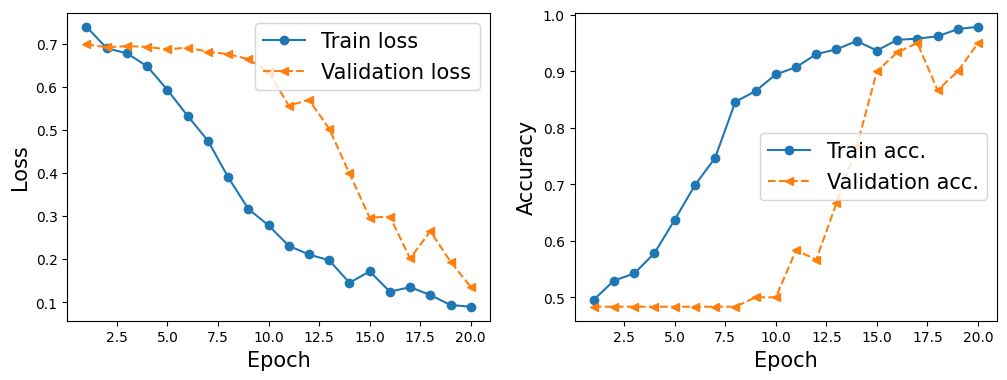

/home/data/manual_annotate/test/NonDrowsy
/home/data/manual_annotate/test/Drowsy
4/4 [==============================] - 0s 11ms/step - loss: 0.5264 - accuracy: 0.7500

----------Model Test Accuracy Results----------

Test Acc. 75.00%
-----------------------------------------------


In [36]:
# rearrange to switch local paths
# model = preprocess_build_train_test('./data/manual_annotate/train', './data/manual_annotate/test', normalize=True)

model = preprocess_build_train_test('/home/data/manual_annotate/train', '/home/data/manual_annotate/test', normalize=True)

#### Build train test 80x80 data

In [42]:
# not sure erroring here, creating this folder:
!rm -rf '/home/data/manual_annotate/train80'
!rm -rf '/home/data/manual_annotate/test80'


# !mkdir '/home/data/manual_annotate/train80'
# !mkdir '/home/data/manual_annotate/test80'

# Not sure if test and train folders are being copied, creating here:
!cp -r '/home/data/manual_annotate/train' '/home/data/manual_annotate/train80'
!cp -r '/home/data/manual_annotate/test' '/home/data/manual_annotate/test80'

/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                                                  
                                                                 
 activation (Activation)     (None, 80, 80, 16)        0         
                                                                 
 dropout (Dropout)           (None, 80, 80, 16)        0         
 

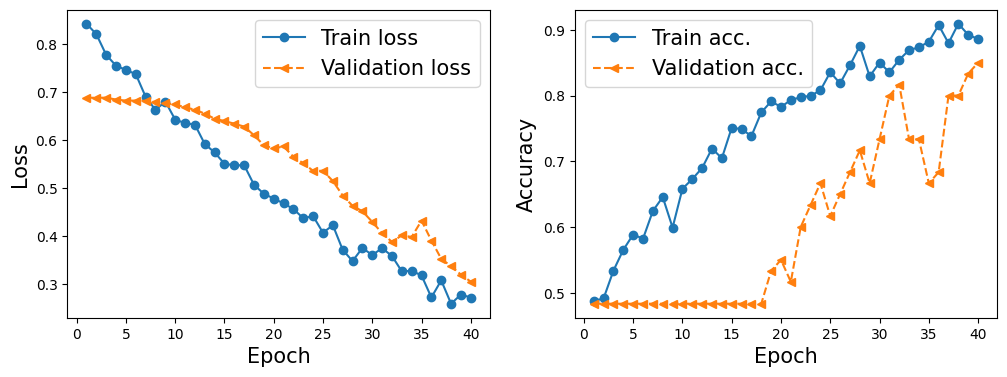

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.7200

----------Model Test Accuracy Results----------

Test Acc. 72.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                               

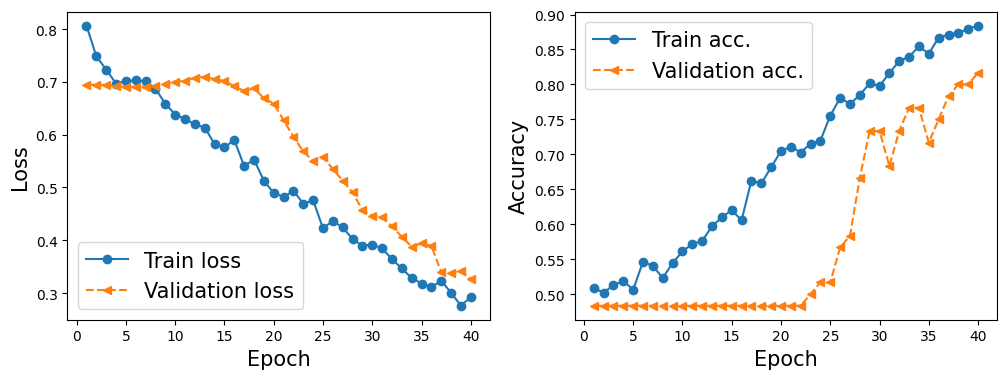

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 7ms/step - loss: 0.5673 - accuracy: 0.7800

----------Model Test Accuracy Results----------

Test Acc. 78.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                               

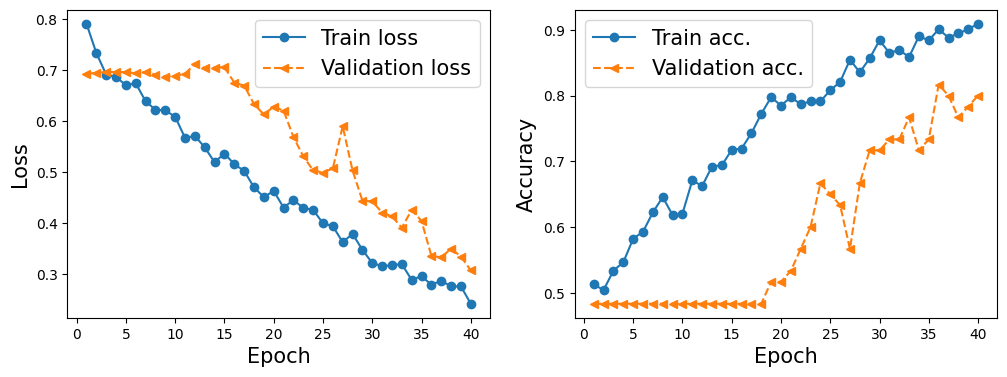

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 8ms/step - loss: 0.5491 - accuracy: 0.6900

----------Model Test Accuracy Results----------

Test Acc. 69.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                               

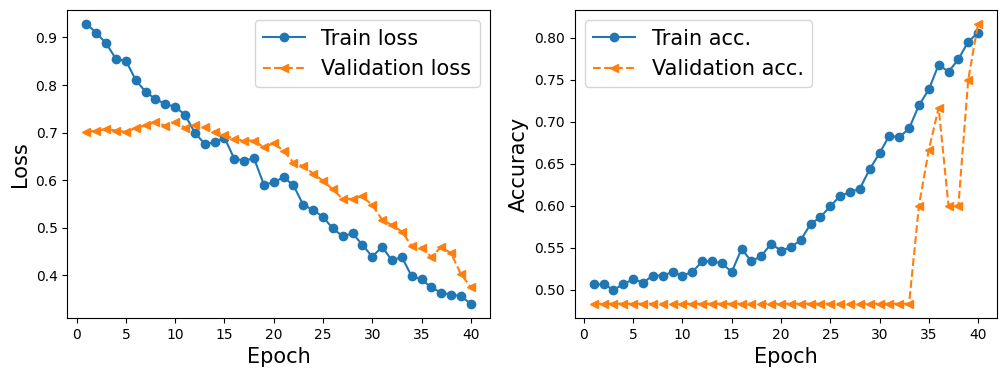

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 9ms/step - loss: 0.6621 - accuracy: 0.6300

----------Model Test Accuracy Results----------

Test Acc. 63.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                               

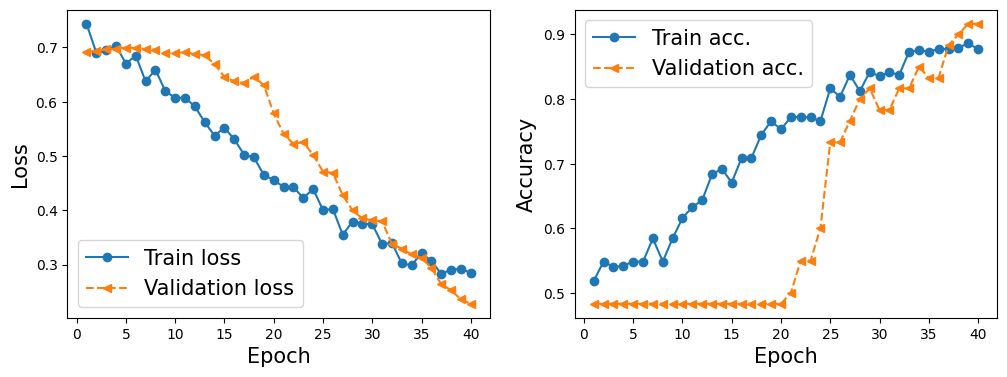

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 14ms/step - loss: 0.5900 - accuracy: 0.7200

----------Model Test Accuracy Results----------

Test Acc. 72.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                              

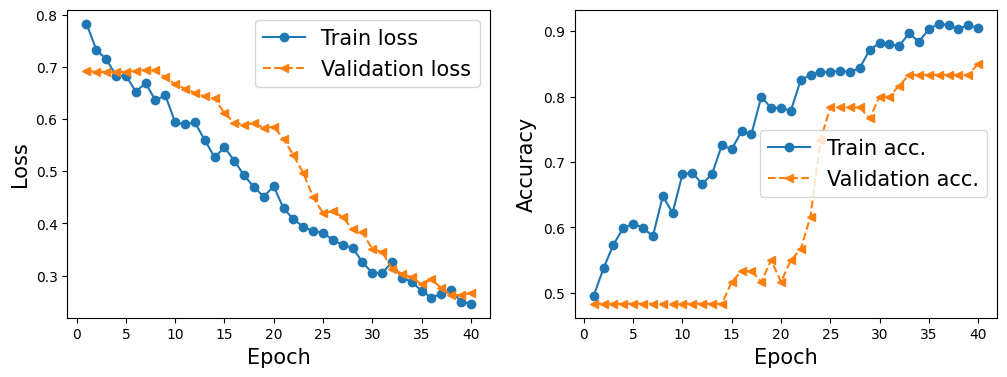

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 11ms/step - loss: 0.5099 - accuracy: 0.7400

----------Model Test Accuracy Results----------

Test Acc. 74.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                              

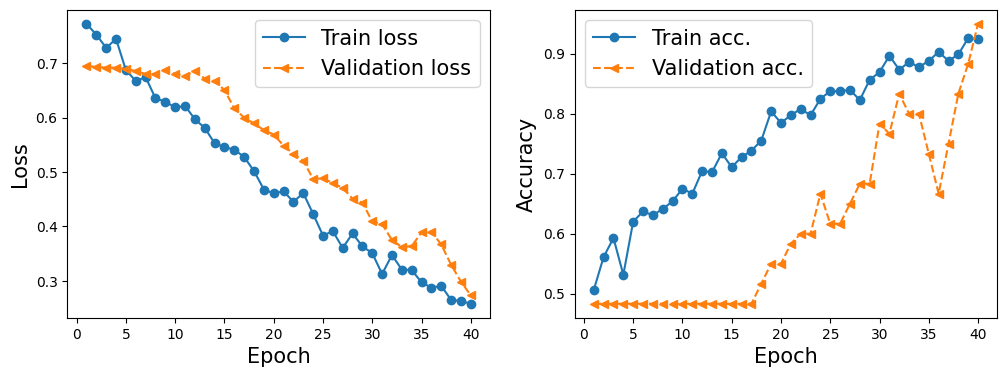

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 9ms/step - loss: 0.4505 - accuracy: 0.8000

----------Model Test Accuracy Results----------

Test Acc. 80.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                               

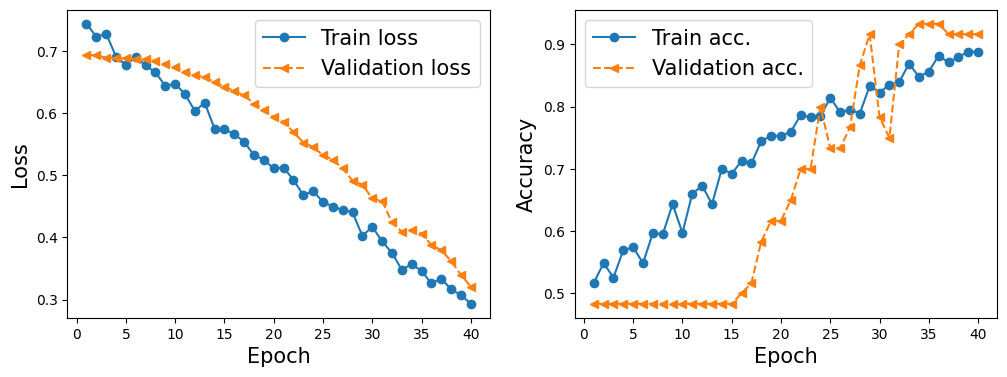

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 9ms/step - loss: 0.5354 - accuracy: 0.8000

----------Model Test Accuracy Results----------

Test Acc. 80.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                               

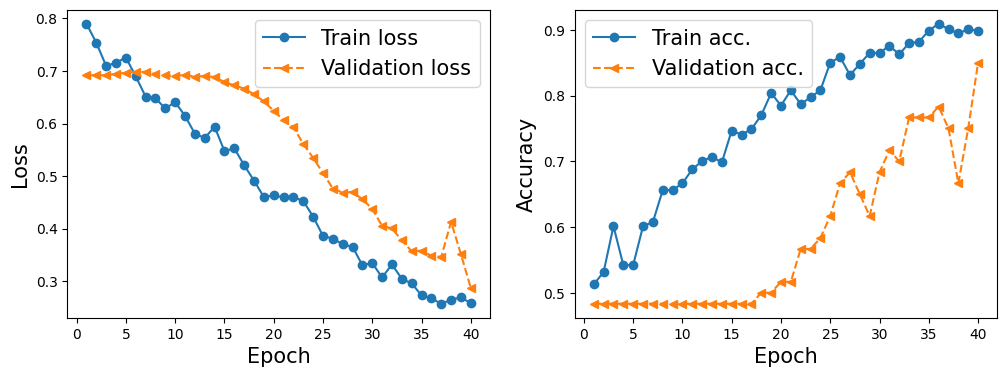

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 8ms/step - loss: 0.5160 - accuracy: 0.7500

----------Model Test Accuracy Results----------

Test Acc. 75.00%
-----------------------------------------------
/home/data/manual_annotate/train80/NonDrowsy
/home/data/manual_annotate/train80/Drowsy

----------Preprocessing Summary----------
images shape (300, 80, 80, 3)
y shape (300,)
X_train shape (474, 80, 80, 3)
y_train shape (474,)
X_val shape (60, 80, 80, 3)
y_val shape (60,)
X_test shape (3, 80, 80, 3)
y_test shape (3,)
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv_1 (Conv2D)             (None, 80, 80, 16)        1216      
                                                                 
 batch_normalization (Batch  (None, 80, 80, 16)        64        
 Normalization)                               

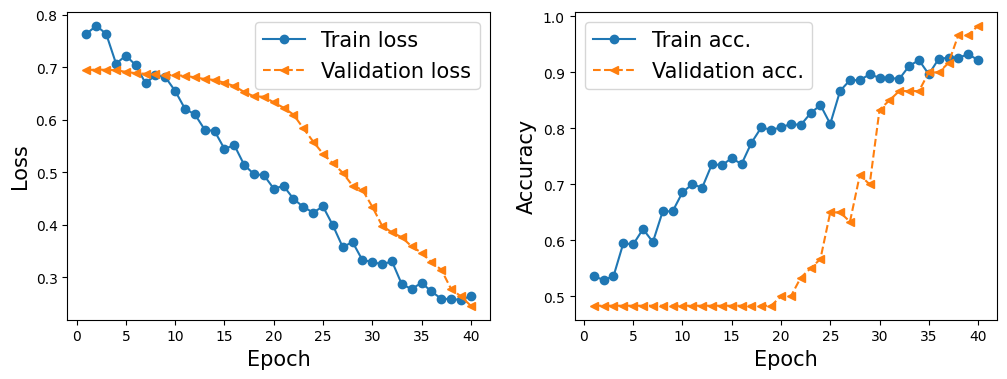

/home/data/manual_annotate/test80/NonDrowsy
/home/data/manual_annotate/test80/Drowsy
4/4 [==============================] - 0s 10ms/step - loss: 0.6043 - accuracy: 0.6400

----------Model Test Accuracy Results----------

Test Acc. 64.00%
-----------------------------------------------
63.999998569488525


In [43]:
test_acc = []
for _ in range(10):
    # model1, test_acc = preprocess_build_train_test('./data/manual_annotate/train80', './data/manual_annotate/test80', normalize=True, learning_rate=0.0001, epochs=40)
    model1, test_acc = preprocess_build_train_test('/home/data/manual_annotate/train80', '/home/data/manual_annotate/test80', normalize=True, learning_rate=0.0001, epochs=40)
print(test_acc)


#### Challenge
Despite achieving commendable levels of accuracy in both training and validation phases, the model exhibited suboptimal performance in the testing phase, as evidenced by lower test accuracy. In an effort to ameliorate this discrepancy, a series of methodical adjustments were implemented: augmenting the model architecture with additional convolutional layers, expanding the model complexity by introducing more dense layers, varying the number of filters within convolutional layers, fine-tuning the learning rate, and altering the number of training epochs. Nonetheless, these modifications failed to yield a significant improvement in the model's ability to generalize effectively to the test images.

Consequently, we shifted our focus to specifically analyzing the eye region, rather than the entire face, for drowsiness detection. To facilitate this approach, we employed external libraries, namely 'face_recognition' and 'dlib', to precisely extract the eye regions from our annotated image dataset. These cropped eye images were then utilized for the training, validation, and testing phases of our model.

#### Eye Images File Count

In [53]:
# Not sure if these folder precreated, recreating for GCP usage:

!rm -rf /home/data/cropped_1/Drowsy
!rm -rf /home/data/cropped_1/NonDrowsy
!rm -rf /home/data/test_cropped_1/Drowsy
!rm -rf /home/data/test_cropped_1/NonDrowsy

!mkdir -p /home/data/cropped_1/Drowsy
!mkdir -p /home/data/cropped_1/NonDrowsy/
!mkdir -p /home/data/test_cropped_1/Drowsy/
!mkdir -p /home/data/test_cropped_1/NonDrowsy/

In [54]:
# eye_train_drowsy = get_file_count('./data/cropped_1/Drowsy')
# eye_train_nondrowsy = get_file_count('./data/cropped_1/NonDrowsy')
# eye_test_drowsy = get_file_count('./data/test_cropped_1/Drowsy')
# eye_test_nondrowsy = get_file_count('./data/test_cropped_1/NonDrowsy')

eye_train_drowsy = get_file_count('/home/data/cropped_1/Drowsy')
eye_train_nondrowsy = get_file_count('/home/data/cropped_1/NonDrowsy')
eye_test_drowsy = get_file_count('/home/data/test_cropped_1/Drowsy')
eye_test_nondrowsy = get_file_count('/home/data/test_cropped_1/NonDrowsy')

eye_drowsy_count = eye_test_drowsy + eye_train_drowsy
eye_nondrowsy_count = eye_test_nondrowsy + eye_train_nondrowsy


# Create a dataframe
df = pd.DataFrame({'Category': ['Drowsy', 'Non Drowsy'], 'Count': [eye_drowsy_count, eye_nondrowsy_count]})

# Display the dataframe
display(df)


,Category,Count
0,Drowsy,0
1,Non Drowsy,0


#### Drowsy Eye Images

IndexError: ignored

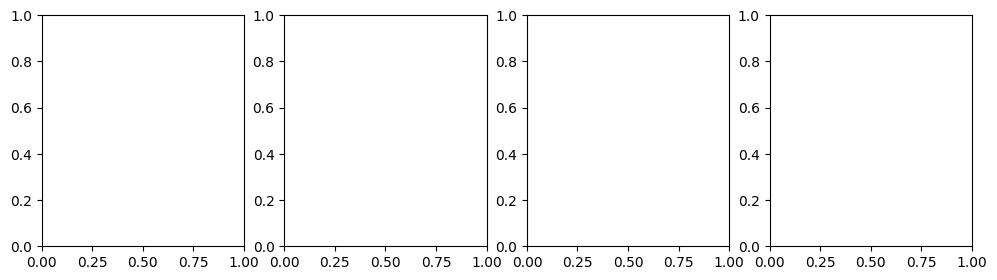

In [55]:
# plot_images(directory = './data/cropped_1/Drowsy', title = 'Drowsy')

plot_images(directory = '/home/data/cropped_1/Drowsy', title = 'Drowsy')

#### Non Drowsy Eye Images

IndexError: ignored

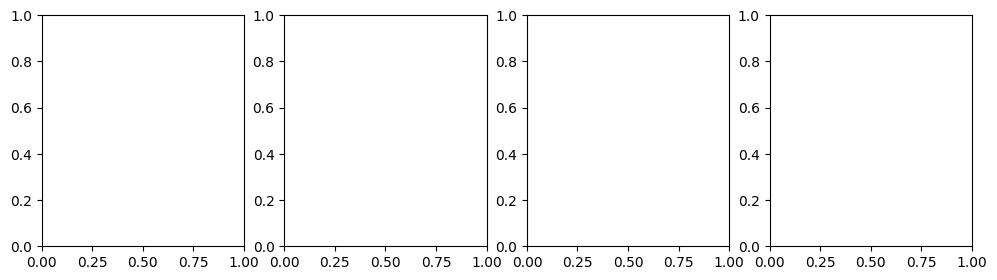

In [56]:
# plot_images(directory = './data/cropped_1/NonDrowsy', title = 'Non Drowsy')

plot_images(directory = '/home/data/cropped_1/NonDrowsy', title = 'Non Drowsy')

In [ ]:
test_accuracy = []
models = []

for _ in range(10):
    # model, test_acc = preprocess_build_train_test('./data/cropped_1',
    #                                     './data/test_cropped_1', normalize=True, learning_rate=0.0001, epochs=40)

    model, test_acc = preprocess_build_train_test('/home/data/cropped_1',
                                         '/home/data/test_cropped_1', normalize=True, learning_rate=0.0001, epochs=40)
    test_accuracy.append(test_acc)
    models.append(model)

print(test_accuracy)


#### Display predictions

In [ ]:
# KP: This portion, Mayank add individual sample image for adhoc test (not in gdrive)

# Preprocess the test images

image_test, label_test = data_preprocess_step1('/Users/mayank/Downloads/face2/face' + '/', num_images=5)
#image_test, label_test = data_preprocess_step1('./data/cropped_1' + '/', num_images=50)
shuffle = np.random.permutation(np.arange(image_test.shape[0]))
image_test, label_test = image_test[shuffle], label_test[shuffle]
image_test = tf.image.resize(image_test, size=(80,80))
image_test = image_test/255.0

# Make predictions using the trained model
pred_logits = models[0].predict(image_test)
probas = tf.sigmoid(pred_logits)
probas = probas.numpy().flatten()*100


# Create a figure to display the test images and their predictions
fig = plt.figure(figsize=(10, 50))

# Iterate over each test example
for j, example in enumerate(image_test):
    ax = fig.add_subplot(int(len(label_test)/4),4, j+1)
    ax.set_xticks([])
    ax.set_yticks([])
    ax.imshow(array_to_img(example))

    # Determine the ground truth label and the predicted probability of being drowsy
    if label_test[j]==0:
        label='Non Drowsy'
    else:
        label='Drowsy'

    # Display the ground truth label and the predicted probability
    ax.text(
        0.5, -0.15,
        'GT: {:s}\nPr(Drowsy)={:.0f}%'.format(label, probas[j]),
        size=10,
        color='black',
        horizontalalignment='center',
        verticalalignment='center',
        transform=ax.transAxes)

plt.tight_layout()
plt.show()


#### Filters Plot

In [ ]:
def plot_filters(model, layer_num):

    # outputs of the first 4 layers, which include conv2D and max pooling layers
    layer_outputs = [layer.output for layer in model.layers[:layer_num]]
    activation_model = models.Model(inputs = model.input, outputs = layer_outputs)
    activations = activation_model.predict(img_tensor)

    # grab layer names
    layer_names = []
    for layer in model.layers[:layer_num]:
        layer_names.append(layer.name)

    # getting activations of each layer
    for idx, layer in enumerate(activations):
        if idx in (0,1):
            print('----------------')
            print('Geeting activations of layer',  idx+1, ':', layer_names[idx])
            activation = layer

            # shape of layer activation
            print('Images size is', activation.shape[1], 'x', activation.shape[2])
            print('Number of channels is', activation.shape[3])

            # print channels
            print('Printing channels:')

            # define nrows and ncols depending on number of channels
            if idx in (0,1):
                nrows, ncols = 8,4
            if idx in (2,3):
                nrows, ncols = 8,8

            # plots
            channel=0
            if idx in (0,1):
                f, axs = plt.subplots(nrows, ncols, figsize=(32,54))
            if idx in (2,3):
                f, axs = plt.subplots(nrows, ncols, figsize=(16,20))

            for i in range(nrows):
                for j in range(ncols):
                    if i==0 and j==0:
                        channel=0
                    else:
                        channel+=1

                    im = axs[i,j].matshow(activation[0,:, :, channel], cmap ='viridis')
                    axs[i,j].set(title=str(channel))
                    plt.colorbar(im, ax=axs[i, j], fraction=0.046, pad=0.04)
                    #axs[i,j].axis('off') # pay attention to the range of x and y axis

            plt.show()

img_tensor = np.expand_dims(image_test[2], axis = 0)
# Print image tensor shape
print('Shape of image:', img_tensor.shape)
# Print image
plt.imshow(img_tensor[0])
plt.title('label:' + str(label_test[2]))
plt.show()

plot_filters(models[2], 2)

In [ ]:

img = load_img('./data/manual_annotate/test80/Drowsy/S0040.png', target_size=(80, 80))

# convert the image to an array using img_to_array
img_array = img_to_array(img)

print(img_array)

#### Additional Models Experimented

In [ ]:
def build_modelV1():
    tf.keras.backend.clear_session()

    model = tf.keras.Sequential()

    # add first convolution layer to the model
    model.add(tf.keras.layers.Conv2D(
        filters=32,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding='same',
        data_format='channels_last',
        name='conv_1',
        activation='relu'))


    # add a max pooling layer with pool size (2,2) and strides of 2
    # (this will reduce the spatial dimensions by half)
    model.add(tf.keras.layers.MaxPool2D(
        pool_size=(2, 2),
        name='pool_1'))


    # add second convolutional layer
    model.add(tf.keras.layers.Conv2D(
        filters=64,
        kernel_size=(5, 5),
        strides=(1, 1),
        padding='same',
        name='conv_2',
        activation='relu'))


    # add second max pooling layer with pool size (2,2) and strides of 2
    # (this will further reduce the spatial dimensions by half)
    model.add(tf.keras.layers.MaxPool2D(
        pool_size=(2, 2), name='pool_2')
    )


    # add a fully connected layer (need to flatten the output of the previous layers first)
    model.add(tf.keras.layers.Flatten())
    model.add(tf.keras.layers.Dense(
        units=1024,
        name='fc_1',
        activation='relu'))

    # add dropout layer
    model.add(tf.keras.layers.Dropout(
        rate=0.5))


    # add the last fully connected layer
    # this last layer sets the activation function to "None" in order to output the logits
    # note that passing activation = "sigmoid" will return class memembership probabilities but
    # in TensorFlow logits are prefered for numerical stability
    # set units=1 to get a single output unit (remember it's a binary classification problem)
    model.add(tf.keras.layers.Dense(
        units=1,
        name='fc_2',
        activation=None))

    # build model and print summary
    tf.random.set_seed(1)
    model.build(input_shape=(None, 80, 80, 3))


    return model

In [ ]:
def build_modelV3():

    # Instantiate the model
    model = tf.keras.Sequential()

    # Adding first three convolutional layers
    model.add(tf.keras.layers.Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu', # activation function
                    input_shape = (80,80,3) # shape of input (image)
                    ))
    model.add(tf.keras.layers.Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function
                    ))
    model.add(tf.keras.layers.Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function
                    ))

    # Adding pooling after convolutional layers
    model.add(tf.keras.layers.MaxPooling2D(pool_size = (2,2))) # Dimensions of the region that you are pooling

    # Adding second set of convolutional layers
    model.add(tf.keras.layers.Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function
                    ))
    model.add(tf.keras.layers.Conv2D(
                    filters = 32, # number of filters
                    kernel_size = (3,3), # height/width of filter
                    activation = 'relu' # activation function
                    ))

    # Add last pooling layer.
    model.add(tf.keras.layers.MaxPooling2D(pool_size=(2,2)))

    model.add(tf.keras.layers.Flatten())

    # Adding first dense layer with 256 nodes
    model.add(tf.keras.layers.Dense(256, activation='relu'))

    # Adding a dropout layer to avoid overfitting
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(128, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))

    model.add(tf.keras.layers.Dense(64, activation='relu'))
    model.add(tf.keras.layers.Dropout(0.3))

    # adding output layer
    model.add(tf.keras.layers.Dense(1, activation = None))

        # build model and print summary
    tf.random.set_seed(1)
    model.build(input_shape=(None, 80, 80, 3))

    return model

#### Aditional utility function to predict images in a directory

In [ ]:
from tensorflow import keras
import pandas as pd
from IPython.display import display, Image


def predict(model, img):
    img= keras.utils.load_img(
        img, target_size=(80, 80))
    img_array = keras.utils.img_to_array(img)
    img_array = tf.expand_dims(img_array, 0)  # Create batch axis
    predictions = model.predict(img_array)

    return predictions


dir_path = "./data/test_cropped/Drowsy/"
i = 0
file_path = []
prediction_results = []
for file_name in os.listdir(dir_path):

    predictions = predict(model, dir_path+file_name)

    print (predictions)

    # Convert logits to probabilities
    probabilities = tf.nn.sigmoid(predictions).numpy()

    prediction_results.append(probabilities[0])
    file_path.append(dir_path+file_name)



data = {'file_path': file_path, 'prediction_results': prediction_results}
df = pd.DataFrame(data)


'''
# Display the dataframe with filepath as a link to the image
for index, row in df.iterrows():
    display(Image(filename=row['file_path']))
    print(row)
'''



# Define the grid size based on the number of images
num_images = len(df)
grid_size = int(num_images ** 0.5) + 1

# Create a grid of subplots
fig, axs = plt.subplots(grid_size, grid_size, figsize=(12, 12))

# Iterate over the dataframe rows and display the image with prediction result
for index, row in df.iterrows():
    img = plt.imread(row['file_path'])
    ax = axs[index // grid_size, index % grid_size]
    ax.imshow(img)
    ax.axis('off')
    ax.set_title(f"Prediction: {row['prediction_results']:.2f}")

# Remove empty subplots
for i in range(num_images, grid_size ** 2):
    axs[i // grid_size, i % grid_size].axis('off')

plt.tight_layout()
plt.show()




print(np.array(prediction_results))
array = np.array(prediction_results)
print(np.size(array))

um_elements_greater_than_zero = np.sum(array > 0)

print (um_elements_greater_than_zero)

um_elements_less_than_zero = np.sum(array < 0)
print (um_elements_less_than_zero)
